# ✈️ Airline Passenger Satisfaction

Bu analizde, bir havayolu şirketine ait müşteri memnuniyeti verisi kullanılarak çeşitli istatistiksel ve görsel analizler yapılacaktır. Bu analizde kullanılan veri seti, yolcu memnuniyetine dair çeşitli hizmet kalemlerini ve uçuş bilgilerini içermektedir.  

## 📄 1. Veri Kümesini Tanıyalım

Aşağıdaki hücrede:
- Veri `pandas` ile okunmuştur.
- İlk 10 gözlem görselleştirilmiş,
- `Age` ve `Flight Distance` sütunları **renk degrade** ile vurgulanmıştır.
- `Inflight wifi service` değişkeni için **çubuk grafik efekti** eklenmiştir.
- `Flight Distance` sütunu daha okunaklı olması için `"xxx km"` formatında gösterilmiştir.

Bu görselleştirme, veri setine genel bir bakış sağlayarak dikkat çeken değerleri fark etmeyi kolaylaştırır.

In [2]:
import pandas as pd
from IPython.display import display

data=pd.read_csv(r"C:\DataSets\archivenew\test.csv")

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)      

styled_df = (data.head(10).style
             .background_gradient(cmap='Blues', subset=['Age', 'Flight Distance'])
             .set_properties(**{'text-align': 'center'})
             .bar(subset=['Inflight wifi service'], color='lightgreen')
             .format({'Flight Distance': "{:.0f} km"})) 

display(styled_df)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160 km,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.000000,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863 km,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.000000,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192 km,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.000000,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377 km,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.000000,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182 km,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.000000,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311 km,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.000000,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987 km,5,5,5,5,3,5,5,5,5,5,5,4,5,3,0,0.000000,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556 km,2,2,2,2,4,4,5,4,4,4,4,5,4,3,77,65.000000,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556 km,5,2,2,2,5,5,5,5,2,2,5,3,3,5,1,0.000000,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744 km,2,2,2,2,3,4,4,4,4,4,4,5,4,4,28,14.000000,satisfied


## 🔍 1.1 Veri Seti Genel Özeti

Veri seti toplam **25 sütun** ve **25.976 satır** içermektedir. Bu sütunlardan:

- **19 tanesi sayısal (int64)**
- **1 tanesi kesirli sayılar içeriyor (float64)**
- **5 tanesi kategorik (object)** veri türündedir.

### 📂 Sütunlar Hakkında

- `Unnamed: 0` ve `id`: Muhtemelen sıralama/teknik amaçlı, analizde kullanılmayabilir.
- `Gender`, `Customer Type`, `Type of Travel`, `Class`, `satisfaction`: Kategorik değişkenlerdir.



In [ ]:
# Veri türleri 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

## 1.2 Sayısal Değişkenlerin Özeti (İstatistiksel Özet)

Veri setindeki sayısal değişkenler için temel istatistikler hesaplanmıştır. Bunlar:
- Gözlem sayısı (`count`)
- Ortalama değer (`mean`)
- Standart sapma (`std`)
- Minimum ve maksimum değerler (`min`, `max`)
- Çeyrek değerler (`25%`, `50%`, `75%`)

### 📌 Öne Çıkan Bulgular:
- Ortalama yolcu yaşı **39.6**, en büyük yaş **85**.
- Uçuş mesafeleri ortalama **1193 km**, maksimum **4983 km**.
- Hizmet puanları 0-5 aralığında olup, genellikle **3–4** arasında yoğunlaşmıştır.
- **Departure Delay** ve **Arrival Delay** değişkenleri ortalamada düşük görünse de,
  bazı uçuşlarda **1000 dakikayı aşan** gecikmeler mevcuttur.


In [14]:
# Sayısal sütunların istatistiksel özeti
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25976.0,12987.500000,7498.769632,0.0,6493.75,12987.5,19481.25,25975.0
id,25976.0,65005.657992,37611.526647,17.0,32170.50,65319.5,97584.25,129877.0
Age,25976.0,39.620958,15.135685,7.0,27.00,40.0,51.00,85.0
Flight Distance,25976.0,1193.788459,998.683999,31.0,414.00,849.0,1744.00,4983.0
Inflight wifi service,25976.0,2.724746,1.335384,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,25976.0,3.046812,1.533371,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,25976.0,2.756775,1.412951,0.0,2.00,3.0,4.00,5.0
Gate location,25976.0,2.977094,1.282133,1.0,2.00,3.0,4.00,5.0
Food and drink,25976.0,3.215353,1.331506,0.0,2.00,3.0,4.00,5.0
Online boarding,25976.0,3.261665,1.355536,0.0,2.00,4.0,4.00,5.0


### 2. Eksik Değer Analizi

Veri setinde yalnızca **"Arrival Delay in Minutes"** sütununda eksik değer bulunmaktadır.  
Eksik değer sayısı 83 olup, bu da toplam verinin %0.32'sine denk gelmektedir.  

Eksik veri oranının düşük olması nedeniyle analiz üzerinde önemli bir etkisi beklenmemektedir.  
Ancak bu eksik değerlerin uygun şekilde işlenmesi önemlidir.

In [5]:
missing_values = data.isnull().sum()
missing_ratio = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    "Eksik Değer Sayısı": missing_values,
    "Eksik Değer Oranı (%)": missing_ratio
}).sort_values(by="Eksik Değer Oranı (%)", ascending=False)

display(missing_df[missing_df["Eksik Değer Sayısı"] > 0])


,Eksik Değer Sayısı,Eksik Değer Oranı (%)
Arrival Delay in Minutes,83,0.319526


## 3. Sayısal Değişkenlerin Seçilmesi

Aykırı değer analizi yalnızca **sayısal değişkenler (numeric features)** üzerinde uygulanabilir. Bu nedenle, veri setindeki sadece `int64` ve `float64` veri tipine sahip sütunlar seçilmiştir.

Ayrıca:
- `Unnamed: 0` ve `id` sütunları analiz dışı bırakılmıştır. Çünkü bunlar veri analizinde **anlamsız** olan, teknik amaçla kullanılan sütunlardır:
  - `id`: Yolculara atanmış eşsiz kimlik numarasıdır.
  - `Unnamed: 0`: Genellikle CSV'den veri aktarımı sırasında oluşan gereksiz bir indeks sütunudur.

In [9]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop(['Unnamed: 0', 'id'])

print(numerical_cols)

Index(['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'], dtype='object')


## 3.1 Aykırı Değerlerin IQR Yöntemi ile Tespiti

### Aykırı Değer Nedir?
Aykırı değer, veri setindeki diğer gözlemlerden istatistiksel olarak anlamlı derecede farklı olan, uç veya sıra dışı veri noktalarıdır.  
Bunlar ölçüm hatası, veri girişi hatası, nadir ama gerçek olaylar veya farklı dağılımı gösteren örnekler olabilir.  

### Kullanılan Yöntem: IQR (Interquartile Range)
IQR, verinin ortadaki %50’lik kısmını temsil eder. Hesaplama adımları:

- Q1: Verinin %25’lik alt çeyreği  
- Q3: Verinin %75’lik üst çeyreği  
- **IQR = Q3 - Q1** Verinin ortadaki yoğunluğu

Aykırı değerleri belirlemek için:

- **Alt sınır = Q1 - 1.5 × IQR**  
- **Üst sınır = Q3 + 1.5 × IQR**  
Bu sınırların dışındaki tüm değerler **aykırı değer** kabul edilir.

### Çıktı Özeti
- `Departure Delay in Minutes`: 3.569 aykırı değer  
- `Arrival Delay in Minutes`: 3.538 aykırı değer  
- `Checkin service`: 3.218 aykırı değer  
- `Flight Distance`: 584 aykırı değer  
- Diğer sayısal sütunlarda aykırı değer yoktur.

### Değerlendirme
Gecikme ve hizmet puanlarında çok sayıda aykırı değer var. Bu değerler analiz ve modellemede dikkatle ele alınmalıdır.


In [ ]:
def detect_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), outliers

outlier_summary = []

for col in numerical_cols:
    count, _ = detect_outliers_IQR(data, col)
    outlier_summary.append({'Değişken': col, 'Aykırı Değer Sayısı': count})

outlier_df = pd.DataFrame(outlier_summary).sort_values(by='Aykırı Değer Sayısı', ascending=False)
display(outlier_df)


,Değişken,Aykırı Değer Sayısı
16,Departure Delay in Minutes,3569
17,Arrival Delay in Minutes,3538
13,Checkin service,3218
1,Flight Distance,584
15,Cleanliness,0
14,Inflight service,0
12,Baggage handling,0
11,Leg room service,0
10,On-board service,0
0,Age,0


## 3.2 Aykırı Değerlerin Görselleştirilmesi

Aykırı değerlerin yoğun olarak bulunduğu dört sayısal değişken için hem **boxplot** hem de **histogram** grafiklerinden yararlanılmıştır:

- **Boxplot:** Değerlerin dağılımını, medyanı ve aykırı değerleri gösterir. Noktalar, genel dağılımdan uzak olan uç değerlerdir.
- **Histogram:** Değişkenin dağılım şekli, yoğunluğu ve çarpıklığı hakkında bilgi verir.

Bu grafikler sayesinde, ilgili sütunlarda verinin nasıl dağıldığı ve aykırı değerlerin ne kadar yaygın olduğu görsel olarak analiz edilmiştir.


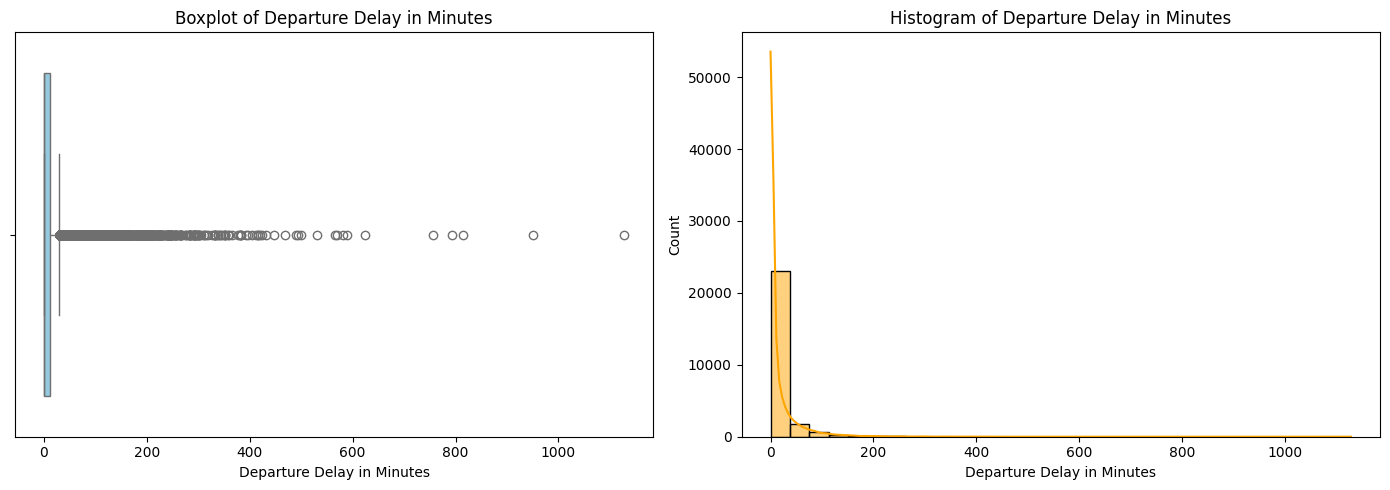

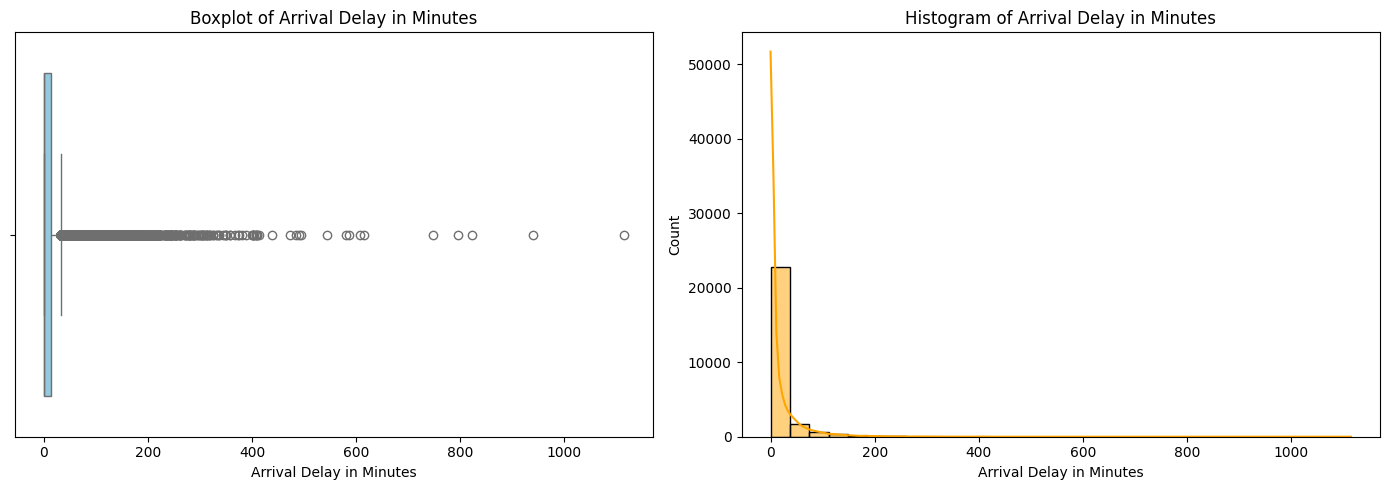

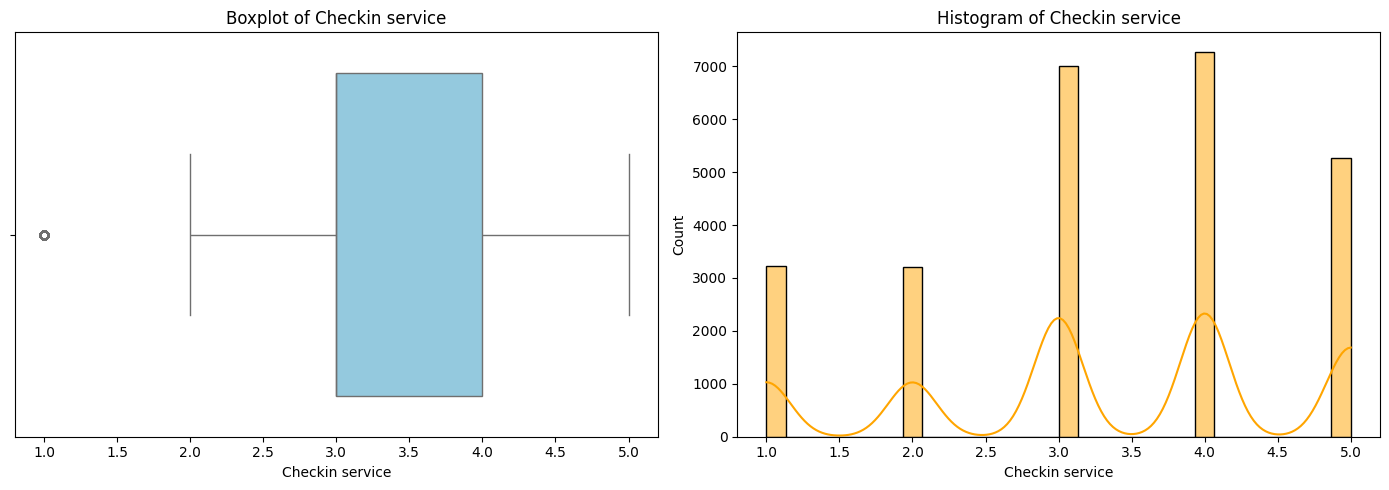

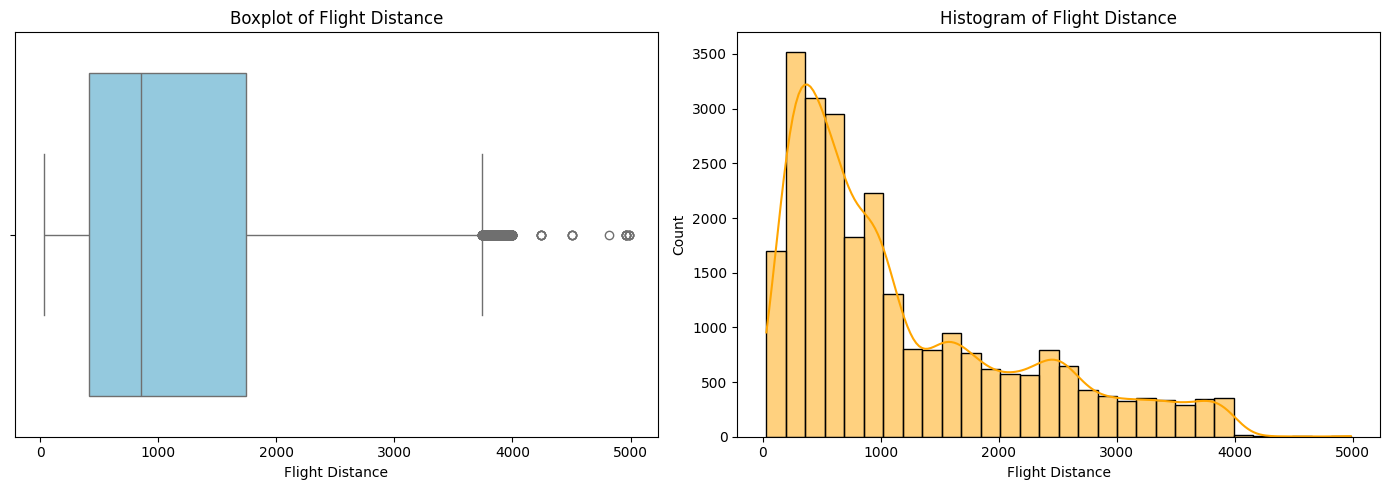

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aykırı değerlerin yoğun olduğu sütunlar
columns_to_plot = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Checkin service', 'Flight Distance']

for col in columns_to_plot:
    plt.figure(figsize=(14,5))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    
    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[col], bins=30, kde=True, color='orange')
    plt.title(f'Histogram of {col}')
    
    plt.tight_layout()
    plt.show()
